# Resolución de problema de clasificación con el conjunto de datos Cancer.csv

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier

In [4]:
# Cargar datos desde CSV
cancer = pd.read_csv('./Datasets/cancer.csv')
cancer

,Age,Gender,BMI,Smoking,GeneticRisk,PhysicalActivity,AlcoholIntake,CancerHistory,Diagnosis
0,58,1,16.085313,0,1,8.146251,4.148219,1,1
1,71,0,30.828784,0,1,9.361630,3.519683,0,0
2,48,1,38.785084,0,2,5.135179,4.728368,0,1
3,34,0,30.040296,0,0,9.502792,2.044636,0,0
4,62,1,35.479721,0,0,5.356890,3.309849,0,1
...,...,...,...,...,...,...,...,...,...
1495,62,1,25.090025,0,0,9.892167,1.284158,0,1
1496,31,0,33.447125,0,1,1.668297,2.280636,1,1
1497,63,1,32.613861,1,1,0.466848,0.150101,0,1
1498,55,0,25.568216,0,0,7.795317,1.986138,1,1


El dataset seleccionado para resolver el problema de clasificación es Cancer.csv obtenido de la base de datos online Kaggle. Es idóneo para el análisis debido a que cuenta con información médica y sobre el estilo de vida de 1500 pacientes y está diseñada para poder predecir la presencia de cáncer en función de diversas características de los pacientes.

El conjunto de datos cuenta con las siguientes características por paciente:
- **Age**: Valor entero que representa la edad, rango entre 20 a 80.
- **Gender**: Valor binario que representa el género, 0 Hombre y 1 Mujer.
- **BMI**: Valor continuo que representa el Índice de Masa Corporal, rango entre 15 a 40.
- **Smoking**: Valor binario que indica la condición de fumador, 0 No y 1 Sí.
- **GeneticRisk**: Valor categórico que representan niveles de riesgo genético de cáncer, 0 Bajo 1 Medio y 2 Alto.
- **PhysicalActivity**: Valor continuo que representa la cantidad de horas por semana dedicadas a actividades física, rango entre 0 a 10.
- **AlcoholIntake**: Valor continuo que representa el número de unidades de alcohol consumidos por semana, rango entre 0 a 5.
- **CancerHistory**: Valor binario que indica si el paciente tiene antecedentes personales de cáncer, 0 No y 1 Sí.
- **Diagnosis**: Valor binario que indica el estado de diagnóstico de Cáncer, 0 Sin cáncer y 1 Cáncer.


#### Dividir los datos en características $X$ y variable objetivo $y$

In [5]:
X = cancer.drop('Diagnosis', axis=1)
y = cancer['Diagnosis']

Al ser la columna *Diagnosis* el diagnóstico binario del paciente donde 0 Sin cáncer y 1 Cáncer, esta es la columna ocupada como variable objetivo $y$, mientras que el resto de columnas serán las características $X$

In [6]:
X

,Age,Gender,BMI,Smoking,GeneticRisk,PhysicalActivity,AlcoholIntake,CancerHistory
0,58,1,16.085313,0,1,8.146251,4.148219,1
1,71,0,30.828784,0,1,9.361630,3.519683,0
2,48,1,38.785084,0,2,5.135179,4.728368,0
3,34,0,30.040296,0,0,9.502792,2.044636,0
4,62,1,35.479721,0,0,5.356890,3.309849,0
...,...,...,...,...,...,...,...,...
1495,62,1,25.090025,0,0,9.892167,1.284158,0
1496,31,0,33.447125,0,1,1.668297,2.280636,1
1497,63,1,32.613861,1,1,0.466848,0.150101,0
1498,55,0,25.568216,0,0,7.795317,1.986138,1


In [7]:
y

0       1
1       0
2       1
3       0
4       1
       ..
1495    1
1496    1
1497    1
1498    1
1499    0
Name: Diagnosis, Length: 1500, dtype: int64

## Gráficos de Dispersión

In [8]:
# Mapear variedades a colores
color_map = {'1': 'red', '0': 'green'}

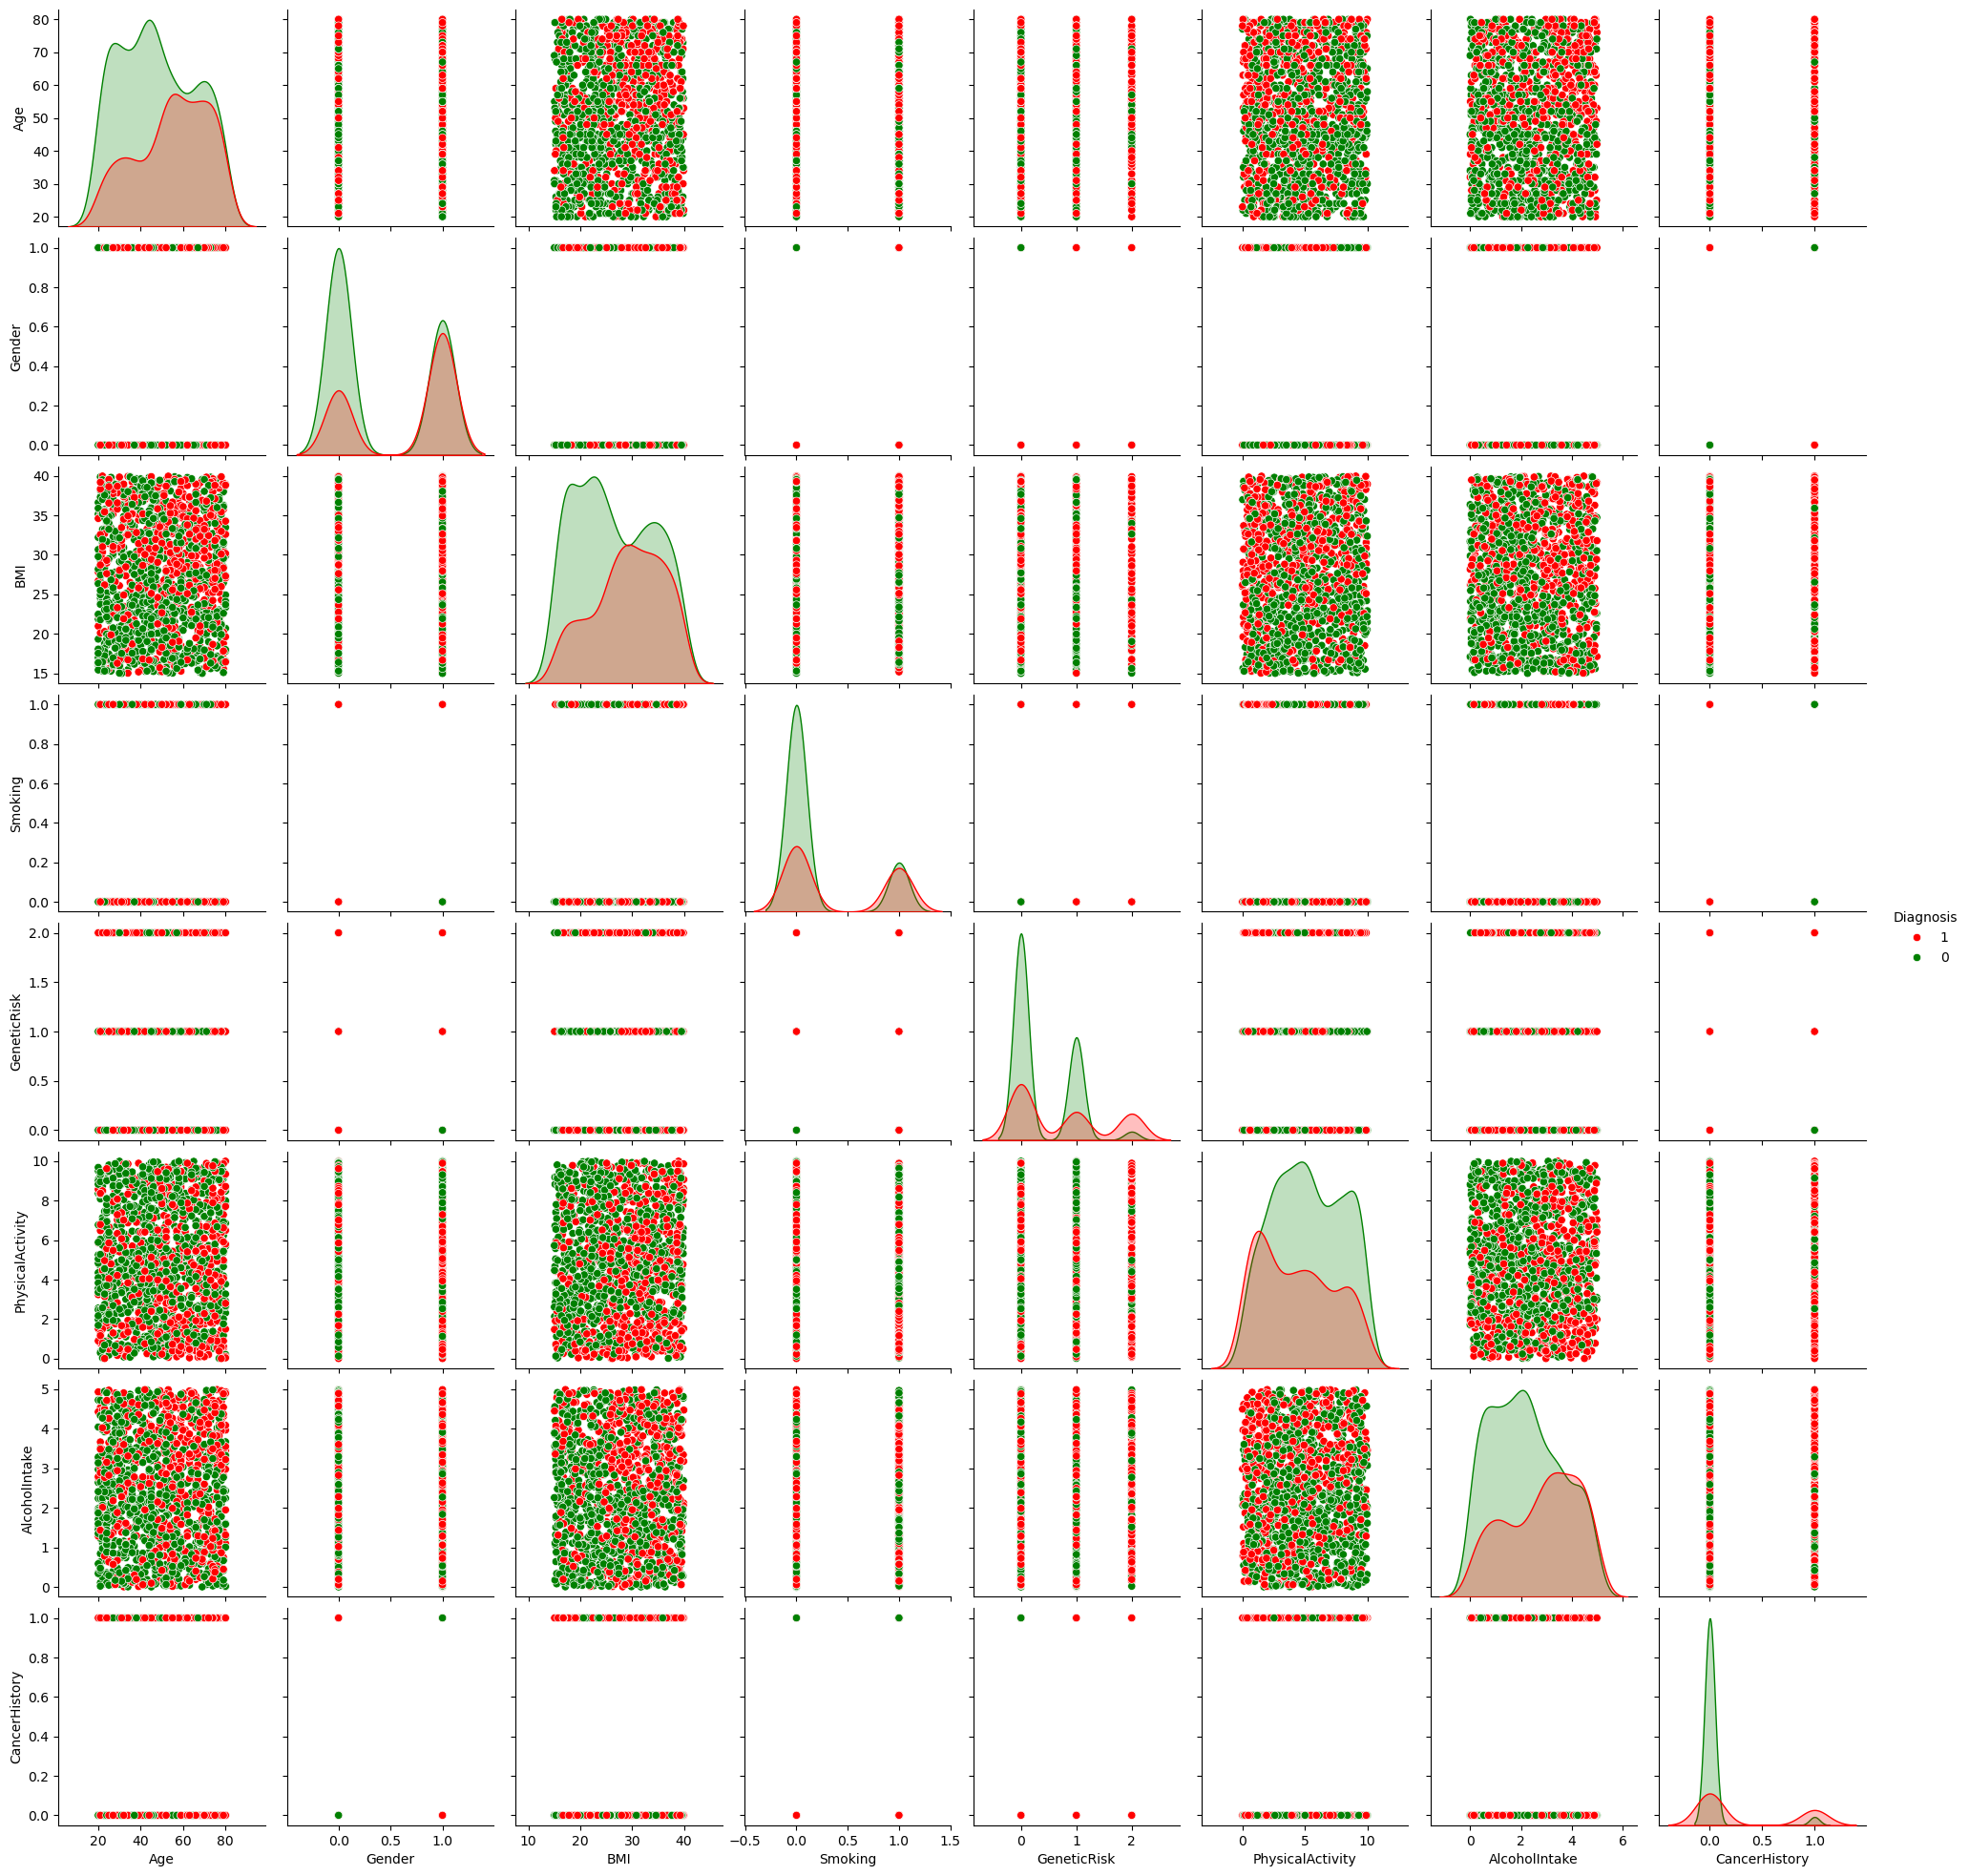

In [9]:
cancer['Diagnosis'] = cancer['Diagnosis'].astype(str)
sns.pairplot(cancer, hue='Diagnosis', palette=color_map)
plt.show()

Observando los diferentes gráficos de dispersión, se puede notar como no existe una relación clara entre las características $X$ y la variable objetivo $y$. Esto representa una gran dispersión en todas las muestras, por lo que un aprendizaje supervisado de clasificación es muy beneficioso por su capacidad de identificar características relevantes para el conjunto de datos, generalizando de manera correcta y encontrando patrones importantes para una predicción.

# Clasificación

### Dividir dataset en conjunto de entrenamiento y prueba

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Modelo Regresión Logística de la librería Scikit-Learn

#### Inicializar y entrenar el modelo

In [11]:
rl_model = LogisticRegression(max_iter=200)
rl_model.fit(X_train, y_train)

LogisticRegression(max_iter=200)

#### Predecir en el conjunto de prueba

In [12]:
y_pred = rl_model.predict(X_test)

#### Precisión del modelo

In [13]:
# Calcular precisión
accuracy_rl = accuracy_score(y_test, y_pred)
print("Accuracy del modelo de Regresión Logística: {:.2f}".format(accuracy_rl))

Accuracy del modelo de Regresión Logística: 0.86


Matriz de Confusión:
[[253  22]
 [ 41 134]]


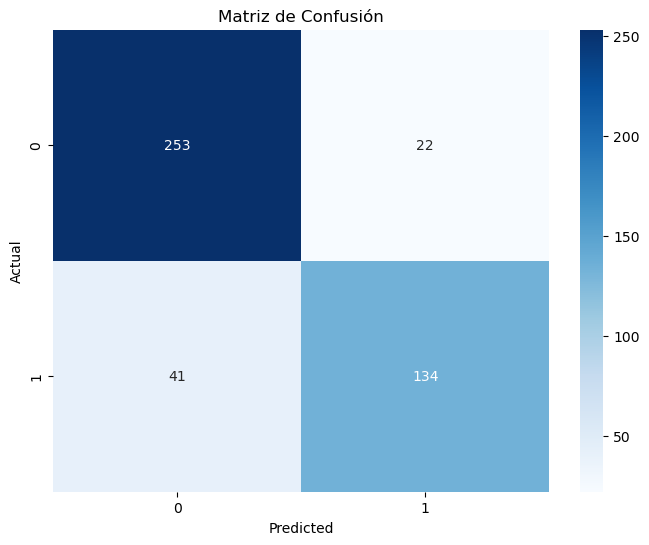

In [14]:
# Calcular matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print("Matriz de Confusión:")
print(conf_matrix)

# Obtener etiquetas únicas presentes en y_test y y_pred
labels = sorted(set(y_test) | set(y_pred))
labels = [str(label) for label in labels]

# Visualizar matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Matriz de Confusión')
plt.show()


### Reporte de Clasificación

In [15]:
# Calcular precision, recall y F1-score
report = classification_report(y_test, y_pred, target_names=labels)
print(report)
report_rl = classification_report(y_test, y_pred, target_names=labels, output_dict=True)

              precision    recall  f1-score   support

           0       0.86      0.92      0.89       275
           1       0.86      0.77      0.81       175

    accuracy                           0.86       450
   macro avg       0.86      0.84      0.85       450
weighted avg       0.86      0.86      0.86       450



## Modelo Máquinas de soporte vectorial de la librería Scikit-Learn

#### Inicializar y entrenar el modelo

In [16]:
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

SVC(kernel='linear')

#### Predecir en el conjunto de prueba

In [17]:
y_pred = svm_model.predict(X_test)

#### Precisión del modelo

In [18]:
accuracy_SVM = accuracy_score(y_test, y_pred)
print("Accuracy del modelo SVM: {:.2f}".format(accuracy_SVM))

Accuracy del modelo SVM: 0.86


Matriz de Confusión:
[[255  20]
 [ 43 132]]


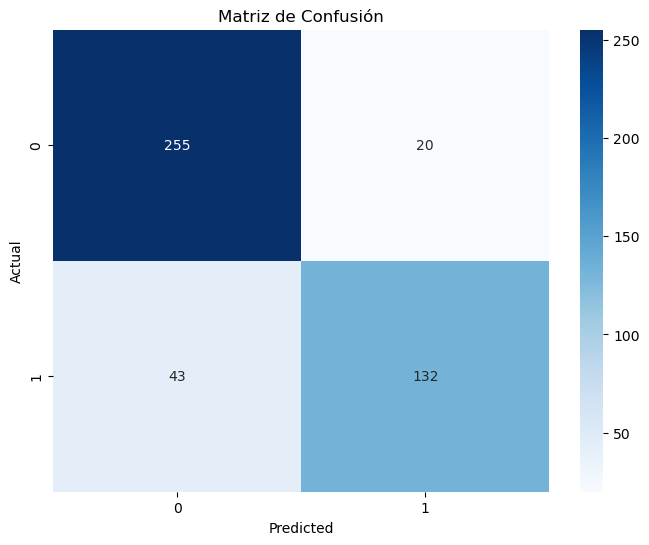

In [19]:
# Calcular matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print("Matriz de Confusión:")
print(conf_matrix)

# Obtener etiquetas únicas presentes en y_test y y_pred
labels = sorted(set(y_test) | set(y_pred))
labels = [str(label) for label in labels]

# Visualizar matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Matriz de Confusión')
plt.show()

### Reporte de Clasificación

In [20]:
# Calcular precision, recall y F1-score
report = classification_report(y_test, y_pred, target_names=labels)
print(report)
report_SVM = classification_report(y_test, y_pred, target_names=labels, output_dict=True)

              precision    recall  f1-score   support

           0       0.86      0.93      0.89       275
           1       0.87      0.75      0.81       175

    accuracy                           0.86       450
   macro avg       0.86      0.84      0.85       450
weighted avg       0.86      0.86      0.86       450



## Modelo Árbol de decisión de la librería Scikit-Learn

#### Inicializar y entrenar el modelo

In [21]:
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

DecisionTreeClassifier()

#### Predecir en el conjunto de prueba

In [22]:
y_pred = tree_model.predict(X_test)

#### Calcular precisión

In [23]:
accuracy_tree = accuracy_score(y_test, y_pred)
print("Accuracy del modelo de Árbol de Decisión: {:.2f}".format(accuracy_tree))

Accuracy del modelo de Árbol de Decisión: 0.86


Matriz de Confusión:
[[250  25]
 [ 38 137]]


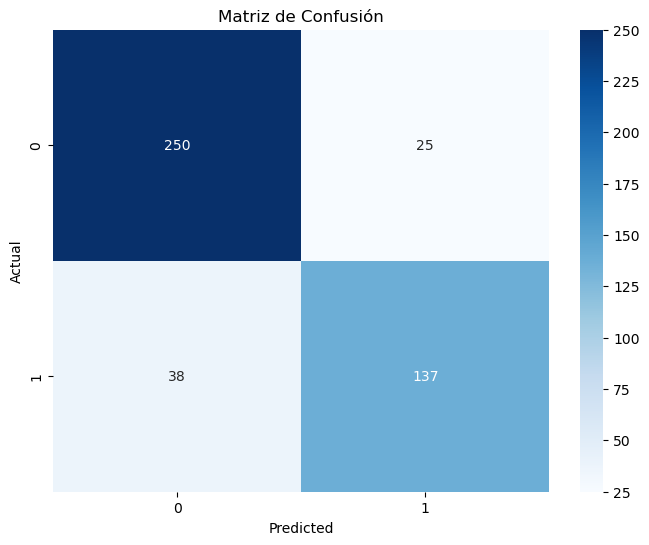

In [24]:
# Calcular matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print("Matriz de Confusión:")
print(conf_matrix)

# Obtener etiquetas únicas presentes en y_test y y_pred
labels = sorted(set(y_test) | set(y_pred))
labels = [str(label) for label in labels]

# Visualizar matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Matriz de Confusión')
plt.show()

### Reporte de Clasificación

In [25]:
# Calcular precision, recall y F1-score
report = classification_report(y_test, y_pred, target_names=labels)
print(report)
report_tree = classification_report(y_test, y_pred, target_names=labels, output_dict=True)

              precision    recall  f1-score   support

           0       0.87      0.91      0.89       275
           1       0.85      0.78      0.81       175

    accuracy                           0.86       450
   macro avg       0.86      0.85      0.85       450
weighted avg       0.86      0.86      0.86       450



## Modelo Ensemble: Bagging de la librería Scikit-Learn

#### Inicializar y entrenar el modelo con un árbol de decisión

In [26]:
bagging_model = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=10, random_state=42)
bagging_model.fit(X_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(), random_state=42)

#### Predecir en el conjunto de prueba

In [27]:
y_pred = bagging_model.predict(X_test)

#### Calcular precisión

In [28]:
accuracy_bagging = accuracy_score(y_test, y_pred)
print("Accuracy del modelo de Ensamble Bagging con Árbol de Decisión: {:.2f}".format(accuracy_bagging))

Accuracy del modelo de Ensamble Bagging con Árbol de Decisión: 0.89


Matriz de Confusión:
[[261  14]
 [ 35 140]]


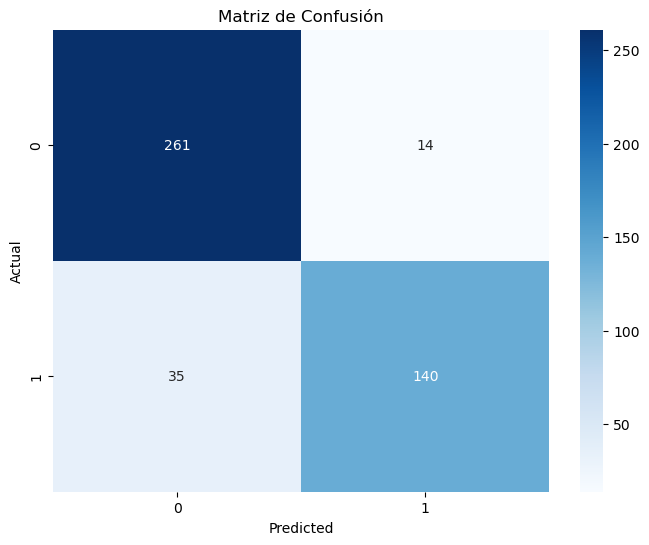

In [29]:
# Calcular matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print("Matriz de Confusión:")
print(conf_matrix)

# Obtener etiquetas únicas presentes en y_test y y_pred
labels = sorted(set(y_test) | set(y_pred))
labels = [str(label) for label in labels]

# Visualizar matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Matriz de Confusión')
plt.show()

### Reporte de Clasificación

In [30]:
# Calcular precision, recall y F1-score
report = classification_report(y_test, y_pred, target_names=labels)
print(report)
report_bagging = classification_report(y_test, y_pred, target_names=labels, output_dict=True)

              precision    recall  f1-score   support

           0       0.88      0.95      0.91       275
           1       0.91      0.80      0.85       175

    accuracy                           0.89       450
   macro avg       0.90      0.87      0.88       450
weighted avg       0.89      0.89      0.89       450



##

## Interpretación de Resultados

In [31]:
models = {
    "Regresión Logística": report_rl,
    "Máquinas de Soporte Vectorial": report_SVM,
}

for name, report in models.items():
    print(f"{name} - Reporte de Clasificación:")
    for label in labels:
        print(f"Clase {label}:")
        print(f"  Precisión: {report[label]['precision']}")
        print(f"  Recall: {report[label]['recall']}")
        print(f"  F1-Score: {report[label]['f1-score']}")
        print(f"  Soporte: {report[label]['support']}")
    print("\n")

Regresión Logística - Reporte de Clasificación:
Clase 0:
  Precisión: 0.8605442176870748
  Recall: 0.92
  F1-Score: 0.8892794376098418
  Soporte: 275.0
Clase 1:
  Precisión: 0.8589743589743589
  Recall: 0.7657142857142857
  F1-Score: 0.8096676737160121
  Soporte: 175.0


Máquinas de Soporte Vectorial - Reporte de Clasificación:
Clase 0:
  Precisión: 0.8557046979865772
  Recall: 0.9272727272727272
  F1-Score: 0.8900523560209425
  Soporte: 275.0
Clase 1:
  Precisión: 0.868421052631579
  Recall: 0.7542857142857143
  F1-Score: 0.8073394495412844
  Soporte: 175.0




In [32]:
models = {
    "Árbol de Decisión": report_tree,
    "Ensemble: Bagging": report_bagging
}

for name, report in models.items():
    print(f"{name} - Reporte de Clasificación:")
    for label in labels:
        print(f"Clase {label}:")
        print(f"  Precisión: {report[label]['precision']}")
        print(f"  Recall: {report[label]['recall']}")
        print(f"  F1-Score: {report[label]['f1-score']}")
        print(f"  Soporte: {report[label]['support']}")
    print("\n")

Árbol de Decisión - Reporte de Clasificación:
Clase 0:
  Precisión: 0.8680555555555556
  Recall: 0.9090909090909091
  F1-Score: 0.8880994671403197
  Soporte: 275.0
Clase 1:
  Precisión: 0.845679012345679
  Recall: 0.7828571428571428
  F1-Score: 0.8130563798219584
  Soporte: 175.0


Ensemble: Bagging - Reporte de Clasificación:
Clase 0:
  Precisión: 0.8817567567567568
  Recall: 0.9490909090909091
  F1-Score: 0.9141856392294221
  Soporte: 275.0
Clase 1:
  Precisión: 0.9090909090909091
  Recall: 0.8
  F1-Score: 0.851063829787234
  Soporte: 175.0




Observando todos los reportes de clasificación de cada modelo, ocupando un tamaño del conjunto de entrenamiento